In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
temp = np.zeros((180,62))

In [3]:
salt = np.zeros((180,62))
i = 0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        salt[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(338,500)]
i =0
salt2 = np.zeros((162,62))

In [5]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/group/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[0,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        salt2[i] = aveplot
        
        i = i + 1
#********************************************************************

In [6]:
salt338 = np.zeros((8,62))
i=0

In [7]:
# 224:343 --------- 64S-69S
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(330,338)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SALT_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['SALT'][0,:,:]
        #plotvar[plotvar < 0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[:,200:400,700:1000]
        plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        salt338[i,:] = aveplot[:]
        
        i = i + 1

In [8]:
ddsur = np.vstack((salt, salt338))
ddsurfinal = np.vstack((ddsur, salt2))

In [9]:
ddsurfinal.shape

(350, 62)

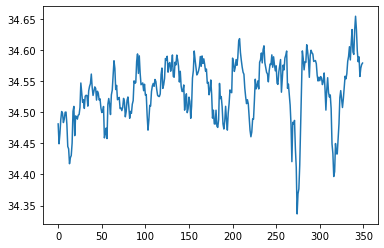

In [10]:
plt.plot(ddsurfinal[:,0])

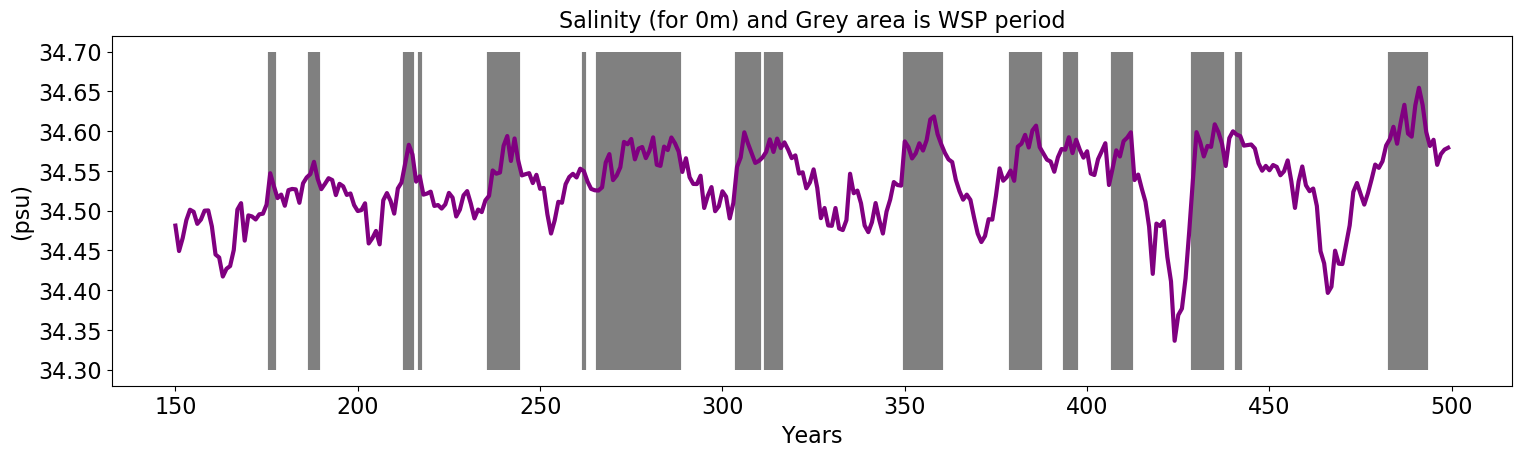

In [13]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])

ax0.plot(ddsurfinal[:,0],'purple',linewidth=3)
#ax0.plot(ddfinal,'g',linewidth=3)
#y = 0.003*t+67
#ax0.plot(t, y, c='orange',linewidth=3)
#ax0.fill_between(t,y,-ww2,where=-ww2<y,facecolor='purple', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,351,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'k',**my_font)

#plt.vlines(noxx, 34.3, 34.7, colors = "grey",linewidth=3)
#plt.vlines(mrpxx,34.3, 34.7, colors = "blue",linewidth=3)
plt.vlines(wspxx, 34.3, 34.7, colors = "grey",linewidth=3)
#ax0.set(ylim=(27.50, 27.8),xlim=(0, 350))
#ax0.invert_yaxis()
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)

#ax0.set(ylim=(0, 0.25),xlim=(0, 350))
#ax2 = ax0.twinx() 
#ax2.plot(t[:346],temm,'blue',linewidth=2)
#plt.yticks(**my_font)
#plt.ylabel('($^\circ$C) 205m',color= 'blue',**my_font)
#plt.axis("tight")
#plt.ylabel('SAM index',color= 'red',**my_font)
#ax0.set(ylim=(34.3, 34.7),xlim=(0, 350))
ax0.set_title('Salinity (for 0m) and Grey area is WSP period',**my_font)
plt.savefig("sal.png",bbox_inches='tight',dpi=fig.dpi)

In [12]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

In [14]:
np.savetxt('sal1.out', ddsurfinal[:,0])